# DeepLearning_Lesson3: Word Embedding
### Sentiment Analysis on the IMDB dataset

### Task 1
In the code provided,there are three mistake which stop the code to get run successfully; find those mistakes and explain why they need to be corrected to be able to get the code run

In [1]:
from keras.models import Sequential
from keras import layers
from keras.preprocessing.text import Tokenizer
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('DeepLearning_Lesson3/imdb_master.csv',encoding='latin-1')
print(df.head())
sentences = df['review'].values
y = df['label'].values

   Unnamed: 0  type                                             review label  \
0           0  test  Once again Mr. Costner has dragged out a movie...   neg   
1           1  test  This is an example of why the majority of acti...   neg   
2           2  test  First of all I hate those moronic rappers, who...   neg   
3           3  test  Not even the Beatles could write songs everyon...   neg   
4           4  test  Brass pictures (movies is not a fitting word f...   neg   

          file  
0      0_2.txt  
1  10000_4.txt  
2  10001_1.txt  
3  10002_3.txt  
4  10003_3.txt  


In [9]:
#tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
max_review_len = max([len(s.split()) for s in sentences])
vocab_size = len(tokenizer.word_index) + 1

#getting the vocabulary of data
sentences = tokenizer.texts_to_matrix(sentences)

In [10]:
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)

In [11]:
model = Sequential()
model.add(layers.Dense(300, input_dim=2000, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])
history = model.fit(X_train,y_train, epochs=5, verbose=True, validation_data=(X_test,y_test), batch_size=256)

Epoch 1/5
293/293 [==============================] - 8s 26ms/step - loss: 0.8787 - acc: 0.5067 - val_loss: 0.8446 - val_acc: 0.5136
Epoch 2/5
293/293 [==============================] - 6s 20ms/step - loss: 0.7901 - acc: 0.5782 - val_loss: 0.8425 - val_acc: 0.5172
Epoch 3/5
293/293 [==============================] - 6s 20ms/step - loss: 0.6854 - acc: 0.6811 - val_loss: 0.8745 - val_acc: 0.5105
Epoch 4/5
293/293 [==============================] - 6s 20ms/step - loss: 0.4984 - acc: 0.8129 - val_loss: 0.9532 - val_acc: 0.5049
Epoch 5/5
293/293 [==============================] - 6s 21ms/step - loss: 0.2912 - acc: 0.9227 - val_loss: 1.0754 - val_acc: 0.5013


In [ ]:
model.predict(X_text[0])

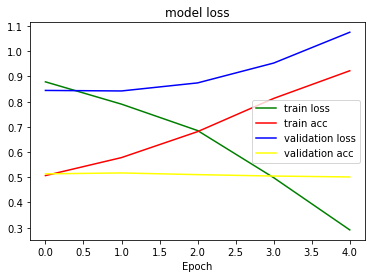

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color="green")
plt.plot(history.history['acc'], color="red")
plt.plot(history.history['val_loss'], color="blue")
plt.plot(history.history['val_acc'], color="yellow")
plt.title('model loss')
plt.xlabel("Epoch")
plt.legend(['train loss', 'train acc','validation loss', 'validation acc'], loc='center right')
plt.show()

### Task 2
Add embedding layer to the model, did you experience any improvement?

In [14]:
from keras.layers import Embedding, Flatten
from keras.preprocessing.sequence import pad_sequences

padded_docs = pad_sequences(sentences, maxlen=max_review_len)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

model2 = Sequential()
model2.add(Embedding(vocab_size, 50, input_length=max_review_len))
model2.add(Flatten())
model2.add(layers.Dense(3, activation='softmax'))
model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
history2 = model2.fit(X_train, y_train, epochs=5, verbose=True, validation_data=(X_test, y_test), batch_size=256)

Epoch 1/5
293/293 [==============================] - 159s 544ms/step - loss: 0.9497 - acc: 0.4950 - val_loss: 0.8781 - val_acc: 0.5086
Epoch 2/5
293/293 [==============================] - 148s 505ms/step - loss: 0.8636 - acc: 0.5236 - val_loss: 0.8736 - val_acc: 0.5139
Epoch 3/5
293/293 [==============================] - 129s 441ms/step - loss: 0.8519 - acc: 0.5322 - val_loss: 0.8724 - val_acc: 0.5142
Epoch 4/5
293/293 [==============================] - 135s 461ms/step - loss: 0.8479 - acc: 0.5376 - val_loss: 0.8735 - val_acc: 0.5146
Epoch 5/5
293/293 [==============================] - 130s 443ms/step - loss: 0.8455 - acc: 0.5400 - val_loss: 0.8729 - val_acc: 0.5167


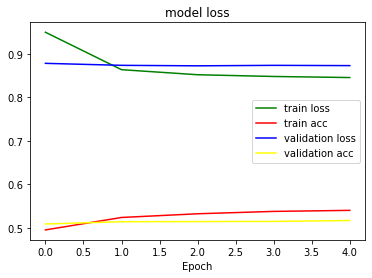

In [17]:
plt.plot(history2.history['loss'], color="green")
plt.plot(history2.history['acc'], color="red")
plt.plot(history2.history['val_loss'], color="blue")
plt.plot(history2.history['val_acc'], color="yellow")
plt.title('model loss')
plt.xlabel("Epoch")
plt.legend(['train loss', 'train acc','validation loss', 'validation acc'], loc='center right')
plt.show()

### Task 3
Apply the codeon 20_newsgroup data set we worked in the previous classes

In [18]:
from sklearn.datasets import fetch_20newsgroups

newsgroups_train = fetch_20newsgroups(subset='train', shuffle=True, categories=['alt.atheism',
                                                                                'comp.graphics',
                                                                                'comp.os.ms-windows.misc',
                                                                                'comp.sys.ibm.pc.hardware',
                                                                                'comp.sys.mac.hardware',
                                                                                'comp.windows.x',
                                                                                'misc.forsale',
                                                                                'rec.autos',
                                                                                'rec.motorcycles',
                                                                                'rec.sport.baseball',
                                                                                'rec.sport.hockey',
                                                                                'sci.crypt',
                                                                                'sci.electronics',
                                                                                'sci.med',
                                                                                'sci.space',
                                                                                'soc.religion.christian',
                                                                                'talk.politics.guns',
                                                                                'talk.politics.mideast',
                                                                                'talk.politics.misc',
                                                                                'talk.religion.misc'])

In [19]:
sentences = newsgroups_train.data
y = newsgroups_train.target

# tokenizing data
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
max_review_len = max([len(s.split()) for s in sentences])
vocab_size = len(tokenizer.word_index) + 1
sentences = tokenizer.texts_to_sequences(sentences)
padded_docs = pad_sequences(sentences, maxlen=max_review_len)

le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(padded_docs, y, test_size=0.25, random_state=1000)

print(len(X_train))
# Number of features
# print(input_dim)
model = Sequential()

model.add(Embedding(vocab_size, 50, input_length=max_review_len))
model.add(Flatten())
model.add(layers.Dense(20, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=50, verbose=True, validation_data=(X_test, y_test), batch_size=256)

8485
Epoch 1/50
34/34 [==============================] - 66s 2s/step - loss: 3.2374 - acc: 0.0443 - val_loss: 2.9947 - val_acc: 0.0407
Epoch 2/50
34/34 [==============================] - 56s 2s/step - loss: 2.9932 - acc: 0.0449 - val_loss: 2.9937 - val_acc: 0.0407
Epoch 3/50
34/34 [==============================] - 54s 2s/step - loss: 2.9925 - acc: 0.0454 - val_loss: 2.9938 - val_acc: 0.0399
Epoch 4/50
34/34 [==============================] - 55s 2s/step - loss: 2.9938 - acc: 0.0454 - val_loss: 2.9939 - val_acc: 0.0403
Epoch 5/50
34/34 [==============================] - 54s 2s/step - loss: 2.9924 - acc: 0.0445 - val_loss: 2.9939 - val_acc: 0.0403
Epoch 6/50
34/34 [==============================] - 55s 2s/step - loss: 2.9921 - acc: 0.0445 - val_loss: 2.9937 - val_acc: 0.0403
Epoch 7/50
34/34 [==============================] - 54s 2s/step - loss: 2.9917 - acc: 0.0445 - val_loss: 2.9941 - val_acc: 0.0403
Epoch 8/50
34/34 [==============================] - 54s 2s/step - loss: 2.9910 - acc:

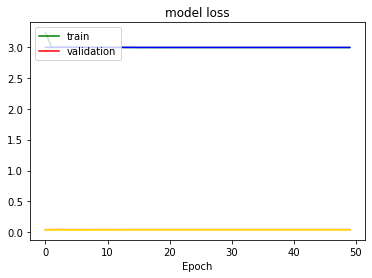

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color="green")
plt.plot(history.history['acc'], color="red")
plt.plot(history.history['val_loss'], color="blue")
plt.plot(history.history['val_acc'], color="yellow")
plt.title('model loss')
plt.xlabel("Epoch")
plt.legend(['train', 'validation'], loc='upper left')
plt.show()